## Loading the csv file and making some changes and verifications

In [128]:
import pandas as pd

In [129]:
# load the dataset mushroom, where the objective is predict whether a mushroom is poisonous or not ("class" column)
dataset = pd.read_csv('./dataset/mushroom_cleaned.csv')
dataset

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [130]:
# change the name "class" to "poisonous"
dataset.rename(columns={'class':'poisonous'}, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   poisonous        54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [131]:
### TO - DO
# Fazer uns gráficos mostrando como os valores de cada parâmetro se distribui
# Se for possível fazer esses valores em relação a ser ou não venenoso

In [132]:
# see if there are any null values
dataset.isnull().sum(axis=0)

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
poisonous          0
dtype: int64

## Making the tests and predictions

In [133]:
from sklearn.model_selection import train_test_split
import graphviz
import time

In [134]:
labels = dataset.poisonous
dataframe = dataset.drop('poisonous',inplace=False, axis=1)

In [135]:
# separating the data in 2 groups (training and testing), the test group will have 10% of the data
train, test, res_train, res_test = train_test_split(dataframe, labels, test_size=0.1, random_state=42)

In [136]:
algorithm = ['DT', 'KNN', 'RL', 'RF']

predict_values = []
predict_probabilities = []
metrics = []
exec_time = []

### Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [138]:
start_time = time.time()

tree = DecisionTreeClassifier()
tree.fit(train, res_train)

end_time = time.time()

exec_time.append(end_time - start_time)

In [139]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [140]:
# plotar a arvore de decisão em pdf para melhor visualização
labels_name = ['0', '1']
graph_date = export_graphviz(tree, feature_names=dataframe.columns, class_names=labels_name, filled=True)
graph = graphviz.Source(graph_date.replace(' fillcolor="#399de5"', ' fillcolor="#399de5", shape="diamond"'))
# graph.render('decision_tree')

# interpretação dos nós da arvore
# +-----------------+
# |  atributo <= ?  | # indica qual atribulo foi selecionado por ter maior ganho de informação e a valor que melhor divide o dataset com base nesse atributo (se verdadeiro vai pra esquerda se falso direita)
# |    gini = ?     | # nivel de impureza do atributo com base na classe
# |   samples = ?   | # quantidade de exemplos dos dados de treino utilizado na analise desse nó
# | values = [ ?]?, | # quantidade de exemplos por classe
# |    class = ?    | # qual a classe se a analise parar nesse nó (selecionado com base na classe com maior número de exemplo (classe majoritária))
# +-----------------+

In [141]:
# predicting using the test group (0 or 1)
predict_values.append(tree.predict(test))
predict_values[0]

array([0, 1, 0, ..., 1, 0, 0])

In [142]:
# predicting using the test group (0 or 1)
predict_probabilities.append(tree.predict_proba(test))
predict_probabilities[0]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

### K-Nearest Neighbors (KNN)

In [143]:
from sklearn.neighbors import KNeighborsClassifier

In [144]:
start_time = time.time()

neighbors = KNeighborsClassifier(n_neighbors=10)
neighbors.fit(train, res_train)

end_time = time.time()

exec_time.append(end_time - start_time)

In [145]:
# neighbors.get_params()

In [146]:
# predicting using the test group (0 or 1)
predict_values.append(neighbors.predict(test))
predict_values[1]

array([0, 1, 0, ..., 1, 0, 0])

In [147]:
# predicting using the test group (0 or 1)
predict_probabilities.append(neighbors.predict_proba(test))
predict_probabilities[1]

array([[0.9, 0.1],
       [0.3, 0.7],
       [1. , 0. ],
       ...,
       [0. , 1. ],
       [0.5, 0.5],
       [0.8, 0.2]])

### Regressão Logística

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
start_time = time.time()

logreg = LogisticRegression(max_iter=1000)
logreg.fit(train, res_train)

end_time = time.time()

exec_time.append(end_time - start_time)

In [150]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [151]:
# predicting using the test group (0 or 1)
predict_values.append(logreg.predict(test))
predict_values[2]

array([0, 1, 0, ..., 1, 0, 0])

In [152]:
# predicting using the test group (0 or 1)
predict_probabilities.append(logreg.predict_proba(test))
predict_probabilities[2]

array([[0.72648152, 0.27351848],
       [0.41700867, 0.58299133],
       [0.61136097, 0.38863903],
       ...,
       [0.36145435, 0.63854565],
       [0.5723126 , 0.4276874 ],
       [0.59436753, 0.40563247]])

### Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
start_time = time.time()

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, res_train)

end_time = time.time()

exec_time.append(end_time - start_time)

In [155]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [156]:
# predicting using the test group (0 or 1)
predict_values.append(random_forest.predict(test))
predict_values[3]

array([0, 1, 0, ..., 1, 0, 0])

In [157]:
# predicting using the test group (0 or 1)
predict_probabilities.append(random_forest.predict_proba(test))
predict_probabilities[3]

array([[1.  , 0.  ],
       [0.03, 0.97],
       [1.  , 0.  ],
       ...,
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.87, 0.13]])

### Support Vector Machine (SVM)

Iniviavel rodar, super lento

## Make some differents evalutions

In [158]:
from sklearn.metrics import confusion_matrix

for i in range(4):
    print(algorithm[i])
    print(confusion_matrix(res_test, predict_values[i]), end='\n\n\n')

# mostra em forma de matriz, quantos deram (1,1), (1,0) (0,1), (0,0)
# como a precisão é alta, os valores da diagonal principal sao maiores
# (0,0)   (0,1)
# (1,0)   (1,1)
# PODE OLHAR SE TA TENDO MAIS FALSO POSITIVO OU FALSO NEGATIVO

DT
[[2364   78]
 [  55 2907]]


KNN
[[1846  596]
 [ 945 2017]]


RL
[[1331 1111]
 [ 814 2148]]


RF
[[2416   26]
 [  13 2949]]




In [159]:
from sklearn.metrics import classification_report, accuracy_score

for i in range(4):
    print(algorithm[i])
    print(classification_report(res_test, predict_values[i], target_names=['0', '1'], digits=5), end='\n\n\n')
    metrics.append(accuracy_score(res_test, predict_values[i]))


DT
              precision    recall  f1-score   support

           0    0.97726   0.96806   0.97264      2442
           1    0.97387   0.98143   0.97764      2962

    accuracy                        0.97539      5404
   macro avg    0.97557   0.97475   0.97514      5404
weighted avg    0.97540   0.97539   0.97538      5404



KNN
              precision    recall  f1-score   support

           0    0.66141   0.75594   0.70552      2442
           1    0.77191   0.68096   0.72359      2962

    accuracy                        0.71484      5404
   macro avg    0.71666   0.71845   0.71456      5404
weighted avg    0.72198   0.71484   0.71542      5404



RL
              precision    recall  f1-score   support

           0    0.62051   0.54505   0.58034      2442
           1    0.65910   0.72519   0.69056      2962

    accuracy                        0.64378      5404
   macro avg    0.63981   0.63512   0.63545      5404
weighted avg    0.64166   0.64378   0.64075      5404



RF


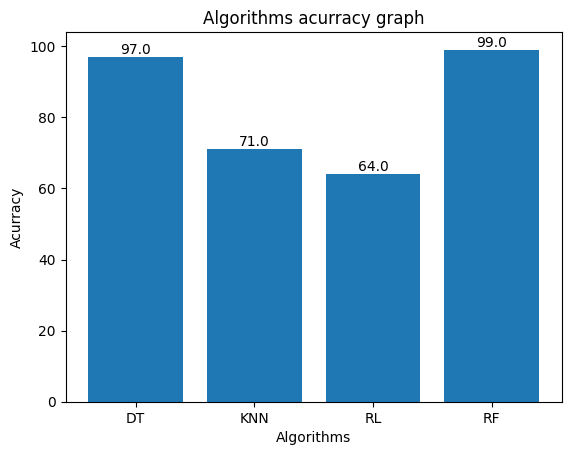

In [160]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
bars = ax.bar(algorithm, [(met*100 // 1) for met in metrics])

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.title('Algorithms acurracy graph')
plt.xlabel('Algorithms')
plt.ylabel('Acurracy')

plt.show()

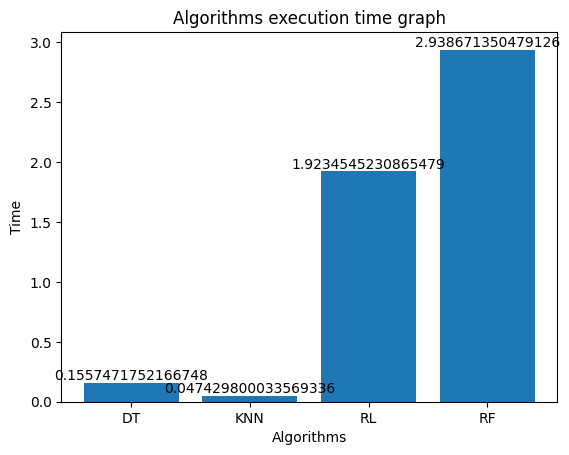

In [161]:
fig, ax = plt.subplots()
bars = ax.bar(algorithm, exec_time)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.title('Algorithms execution time graph')
plt.xlabel('Algorithms')
plt.ylabel('Time')

plt.show()

## Cross Validation

In [162]:
from sklearn.model_selection import StratifiedKFold

alg_runner = {
    'decision_tree' : DecisionTreeClassifier(),
    'KNN' : KNeighborsClassifier(n_neighbors=10),
    'log_reg' : LogisticRegression(max_iter=1000),
    'random_forest' : RandomForestClassifier(n_estimators=100)
}

labels = dataset.poisonous
dataframe = dataset.drop('poisonous',inplace=False, axis=1)

In [163]:
kf = StratifiedKFold(n_splits=5, shuffle=True)

In [164]:
results = []

for fold, (train_index, test_index) in enumerate(kf.split(dataframe, labels)):
    train = dataframe.iloc[train_index]
    train_labels = labels.iloc[train_index]

    test = dataframe.iloc[test_index]
    test_labels = labels.iloc[test_index]

    for alg_name, alg_run in alg_runner.items():
        alg_run.fit(train, train_labels)
        predict = alg_run.predict(test)
        acc = accuracy_score(test_labels, predict)
        results.append([alg_name, fold, acc])

df_results = pd.DataFrame(results, columns=['algorithm', 'fold', 'accuracy']) 
df_results

,algorithm,fold,accuracy
0,decision_tree,0,0.977330
1,KNN,0,0.713426
2,log_reg,0,0.631720
3,random_forest,0,0.990562
4,decision_tree,1,0.978532
5,KNN,1,0.715370
6,log_reg,1,0.630702
7,random_forest,1,0.991209
8,decision_tree,2,0.975942
9,KNN,2,0.712871


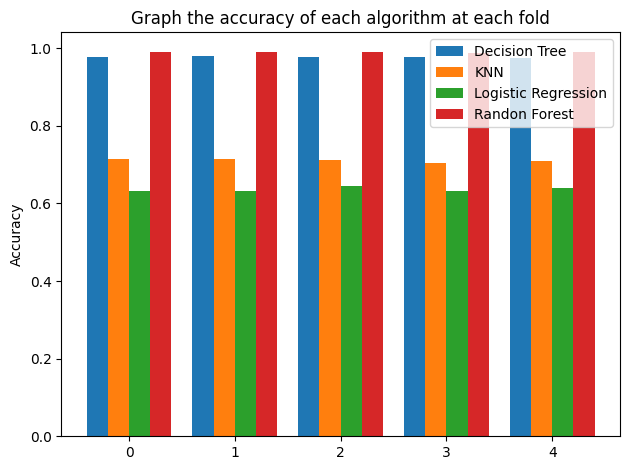

In [165]:
import matplotlib.pyplot as plt
import numpy as np

x_labels = list(set([data[1] for data in results]))
data1 = [data[2] for data in results if data[0] == 'decision_tree']
data2 = [data[2] for data in results if data[0] == 'KNN']
data3 = [data[2] for data in results if data[0] == 'log_reg']
data4 = [data[2] for data in results if data[0] == 'random_forest']

x = np.arange(len(x_labels))
width = 0.2

fig, ax = plt.subplots()

rects1 = ax.bar(x - 1.5*width, data1, width, label='Decision Tree')
rects2 = ax.bar(x - 0.5*width, data2, width, label='KNN')
rects3 = ax.bar(x + 0.5*width, data3, width, label='Logistic Regression')
rects4 = ax.bar(x + 1.5*width, data4, width, label='Randon Forest')

ax.set_ylabel('Accuracy')
ax.set_title('Graph the accuracy of each algorithm at each fold')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

# def autolabel(rects):
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate(f'{height}',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 pontos de deslocamento vertical
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)
# autolabel(rects4)

fig.tight_layout()
plt.show()


Esse gráfico mostra que não está havendo overfitting dos modelos aos dados da dataset

## Making some insights

<Axes: >

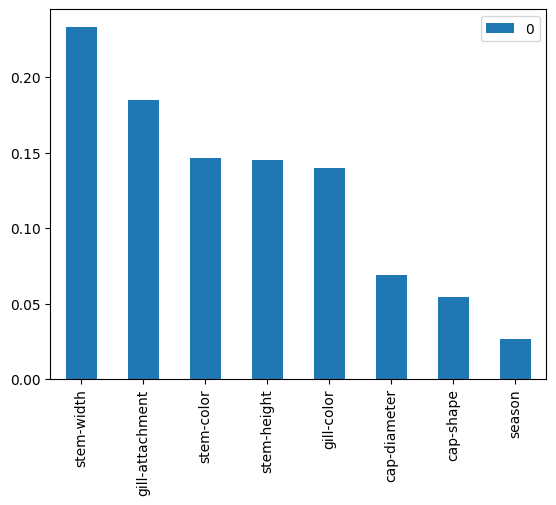

In [166]:
# plot the importance of each parameter in the training
feature_importance = pd.DataFrame(tree.feature_importances_, index=dataframe.columns).sort_values(0, ascending=False)
feature_importance.plot(kind='bar')